# Bike Sharing Dataset

# About Dataset

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

# Pertanyaan Bisnis

1. Pada jam berapa paling banyak penyewa sepeda secara rata-rata?
2. Apa pengaruh Musim pada perilaku penyewa?
3. Pada bulan berapa rata-rata terjadi pelonjakan penyewa?
4. Apa pengaruh hari libur, kerja, dan bagaimana perbandingan banyaknya penyewa sepeda setiap harinya?

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering Data

In [2]:
# Membuat table day
day_df = pd.read_csv("data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Mmebuat tabel hour_df
hour_df = pd.read_csv("data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assesing Data
## day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dataset memiliki 16 fitur dan 731 baris.

In [5]:
# Memeriksa duplikasi day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
# Memeriksa Missing Value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada Missing Value

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
# Menghitung nilai unik
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

## hour_df

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dataset memiliki 17 fitur dan 17378 baris.

In [10]:
# Memeriksa duplikasi hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
# Memeriksa Missing Value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada Missing Value

In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
# Menghitung jumlah nilai unik 
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

## Catatan:

1. Data tersebut tidak ada yang kosong ataupun memiliki duplikat
2. Semua nilai maksimum, minimum, mean tampak masuk akal dan akurat
3. Memiliki 3 nilai unik di kolom cuaca pada day_df
4. Memiliki 4 nilai unik di kolom cuaca pada hour_df

Adapun beberapa hal yang perlu dipertimbangkan:
1. Perlu mengubah datetime menjadi data date
2. Beberapa data categorikal masih belum berupa kategorikal

# Cleaning Data

## day_df

In [14]:
# Mengubah tipe data ke datetime
day_df['dteday'] = pd.to_datetime(day_df.dteday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

## hour_df

In [16]:
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  int64   
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(7), float64(4), int64(5), object(1)
memory usage: 1.4+ MB


Merubah deskripsi pada tabel

In [18]:
# Mengubah angka menjadi keterangan day_df
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

season_map = {
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
}

weekday_map = {
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
}

weather_map = {
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
}

day_df['mnth'] = day_df['mnth'].map(month_map)
day_df['season'] = day_df['season'].map(season_map)
day_df['weekday'] = day_df['weekday'].map(weekday_map)
day_df['weathersit'] = day_df['weathersit'].map(weather_map)


In [19]:
# Mengubah angka menjadi keterangan pada hour_df
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

season_map = {
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
}

weekday_map = {
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
}

weather_map = {
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
}

hour_df['mnth'] = hour_df['mnth'].map(month_map)
hour_df['season'] = hour_df['season'].map(season_map)
hour_df['weekday'] = hour_df['weekday'].map(weekday_map)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_map)

# Eksplorasi Data
## day_df

In [20]:
# Pengelompokkan data berdasarkan bulan 
day_df.groupby(by='mnth').agg({
    'registered': ['max', 'min', 'mean', 'sum']
})

C:\Users\Marisa\AppData\Local\Temp\ipykernel_11508\4115746680.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='mnth').agg({


registered                           
            max   min         mean     sum
mnth                                      
Jan        4185   416  1982.112903  122891
Feb        4546   905  2392.789474  136389
Mar        5893   491  2975.419355  184476
Apr        5950   674  3471.533333  208292
May        6433  2213  4135.500000  256401
Jun        6456  2993  4540.600000  272436
Jul        6790  2298  4303.080645  266791
Aug        6541   889  4502.500000  279155
Sep        6946  1689  4594.466667  275668
Oct        6911    20  4235.354839  262592
Nov        5520   935  3637.133333  218228
Dec        6055   432  3053.919355  189343

In [21]:
# Pengelompokkan data berdasarkan jam berapa pengguna menyewa
hour_df.groupby(by='hr').agg({
    'registered': ['max', 'min', 'mean', 'sum']
})

registered                        
          max min        mean     sum
hr                                   
0         234   0   43.739669   31755
1         139   0   26.871547   19455
2         104   0   18.097902   12940
3          61   0    9.011478    6281
4          22   0    5.098996    3554
5          64   0   18.478382   13249
6         203   0   71.882759   52115
7         572   1  201.009629  146134
8         808   4  337.331499  245240
9         399   6  188.418157  136980
10        351   8  127.191197   92468
11        446   5  148.602476  108034
12        526   3  185.021978  134696
13        491   9  181.352538  132206
14        502  12  165.381344  120563
15        456   4  176.327846  128543
16        481   8  238.238356  173914
17        885  14  387.178082  282640
18        886  20  364.390110  265276
19        662  11  262.752747  191284
20        461   8  189.796703  138172
21        362   6  144.059066  104875
22        327   5  109.082418   79412
23        220   2   72.631868   52876

In [22]:
# Pengelompokan cuaca
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

C:\Users\Marisa\AppData\Local\Temp\ipykernel_11508\1811847411.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weathersit').agg({


cnt                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Misty/Cloudy         8362  605  4035.862348   996858
Light Snow/Rain      4639   22  1803.285714    37869

In [32]:
day_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

C:\Users\Marisa\AppData\Local\Temp\ipykernel_11508\41987825.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

In [33]:
day_df.groupby(by='weekday').agg({
    'cnt':['max','min','mean', 'std']
})

C:\Users\Marisa\AppData\Local\Temp\ipykernel_11508\4271133072.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


cnt                                
          max   min         mean          std
weekday                                      
Sun      8227   605  4228.828571  1872.496629
Mon      7525    22  4338.123810  1793.074013
Tue      7767   683  4510.663462  1826.911642
Wed      8173   441  4548.538462  2038.095884
Thu      7804   431  4667.259615  1939.433317
Fri      8362  1167  4690.288462  1874.624870
Sat      8714   627  4550.542857  2196.693009

In [25]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean'],
    'cnt': ['max', 'min', 'mean']
})
   

C:\Users\Marisa\AppData\Local\Temp\ipykernel_11508\3616940523.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                             cnt                     
             min      mean   max   min         mean  
season                                               
Spring  0.000000  0.582903  7836   431  2604.132597  
Summer  0.254167  0.626948  8362   795  4992.331522  
Fall    0.360000  0.633482  8714  1115  5644.303191  
Winter  0.333478  0.668719  8555    22  4728.162921

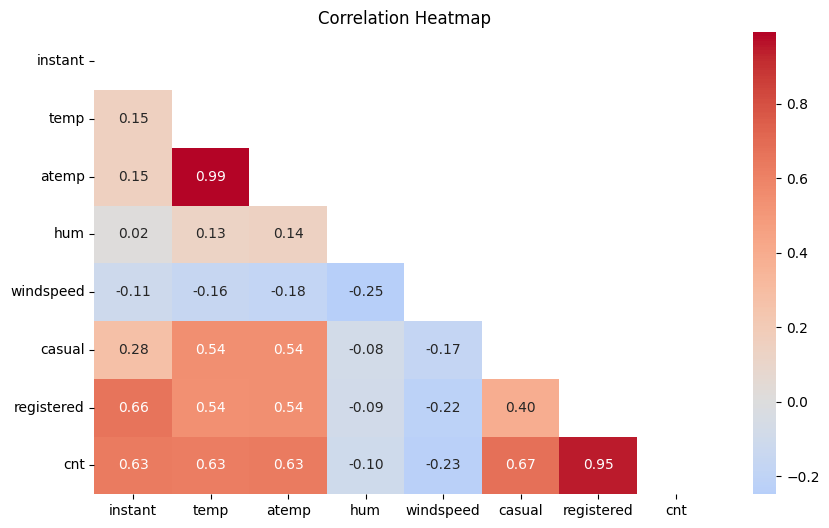

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Perlu menggarisbawahi beberapa korelasi yang kuat seperti cnt dan instant, temp, dan atemp, ini sangat berpengaruh satu sama lain. Kemudian humidity dan windspeed ternyata tidak terlalu berpengaruh terhadap penyewa.

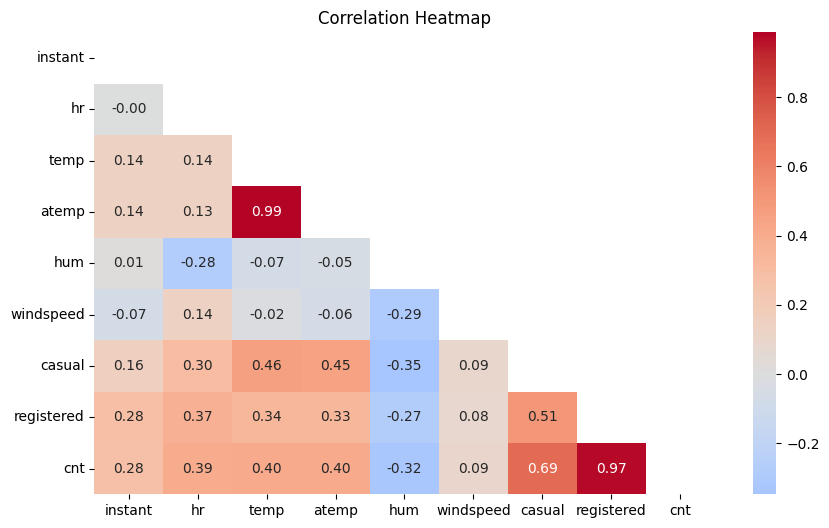

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = hour_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Disini cnt hrm temp, atemp, cukup berkorelasi. Untuk humidity dan windspeed sama spt sebelumnya tidak terlalu berkorelasi satu sama lain dengan cnt

## Pertanyaan 1
Jumlah Pengguna Sepeda berdasarkan Jam

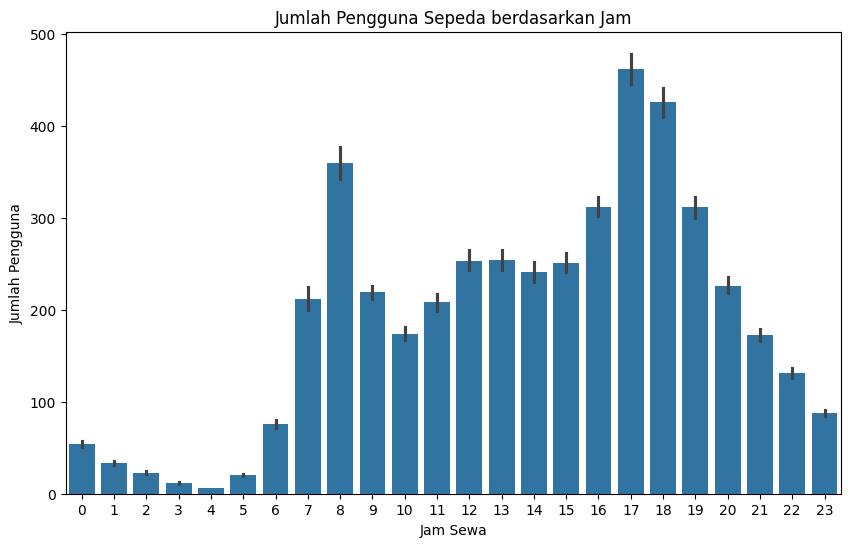

In [83]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='hr',
    y='cnt',
    data=hour_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Jam')
plt.xlabel('Jam Sewa')
plt.ylabel('Jumlah Pengguna')
plt.show()

Disini terlihat bahwa rata-rata orang menyewa paling banyak pada sore hari, puncaknya pada pukul 17.00. Paling sedikit adalah ketikan malam menuju subuh. Di pagi hari jam 8 juga terjadi lonjakan yang sangat signifikan. Ini mengindikasikan persewaan dapat dibuka sebelum jam 8 pagi dan sesudah subuh sekitar jam 6 pagi.

## Pertanyaan 2
Jumlah Pengguna Sepeda berdasarkan Musim

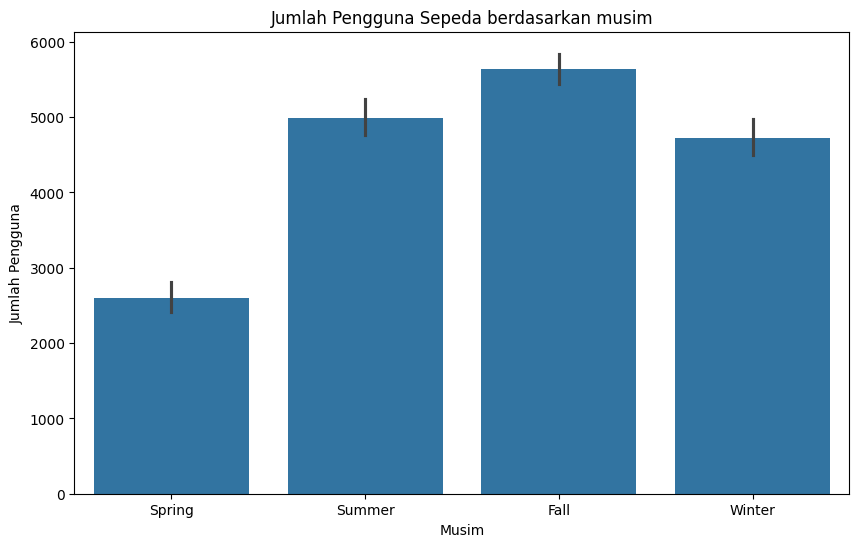

In [84]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='season',
    y='cnt',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.show()

Musim gugur menunjukkan tarif sewa sepeda tertinggi, sedangkan musim semi mencatat tarif terendah.

## Pertanyaan 3
Jumlah Pengguna Sepeda berdasarkan Bulan

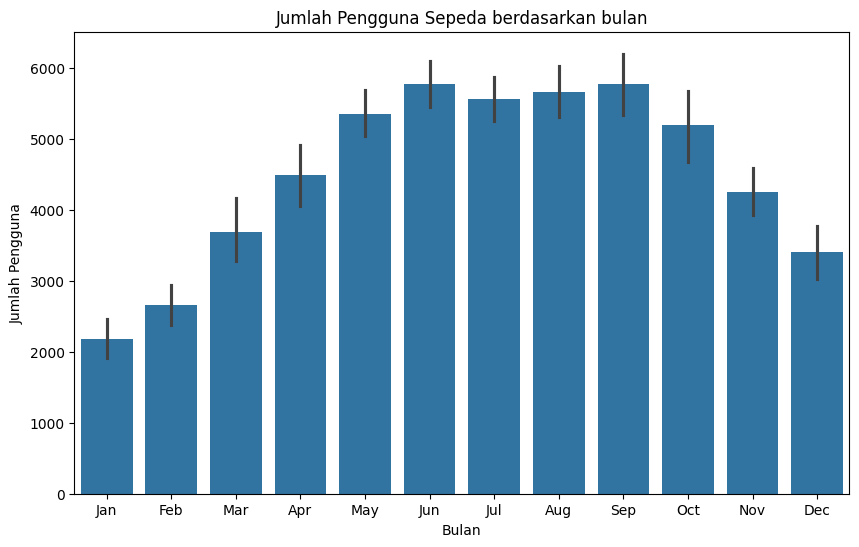

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='mnth',
    y='cnt',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.show()

Bulan September merupakan bulan dengan jumlah penyewaan sepeda terbanyak, sedangkan bulan Januari merupakan bulan terendah.

## Pertanyaan 3
Jumlah Pengguna Sepeda berdasarkan hari kerja

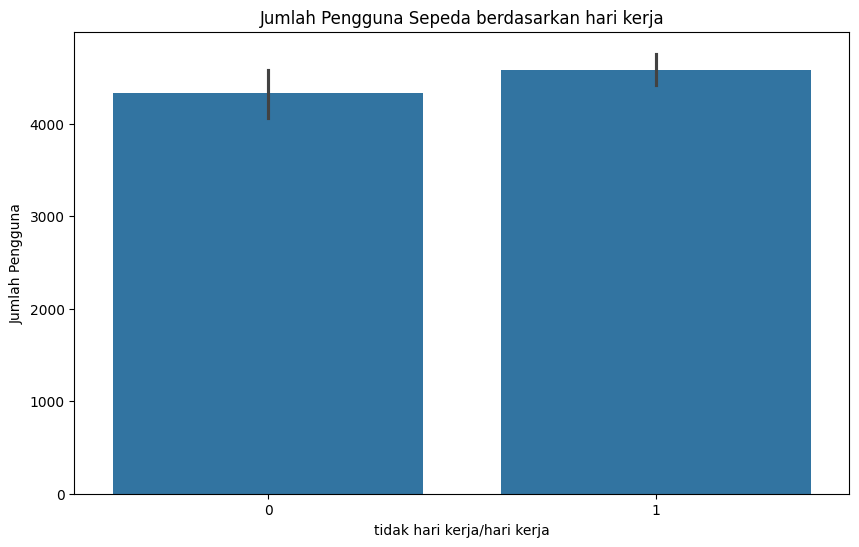

In [87]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='workingday',
    y='cnt',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan hari kerja')
plt.xlabel('tidak hari kerja/hari kerja')
plt.ylabel('Jumlah Pengguna')
plt.show()

Pada hari kerja lebih banyak penyewa dari pada bukan hari kerja

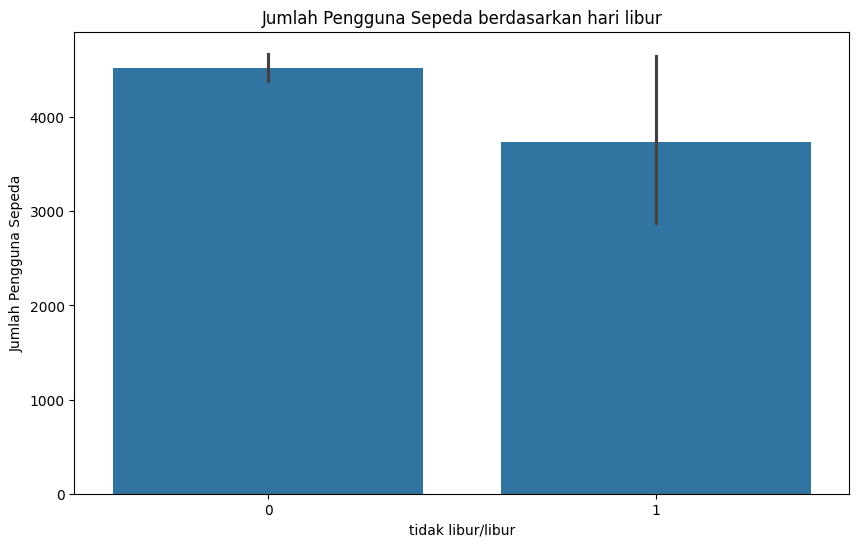

In [88]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='holiday',
    y='cnt',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan hari libur')
plt.xlabel('tidak libur/libur')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Dari informasi yang sudah ada sebelumnya penyewa terbanyak adalah pekerja dan ini masuk akal bahwa penyewa tertinggi ada di hari tidak libur.

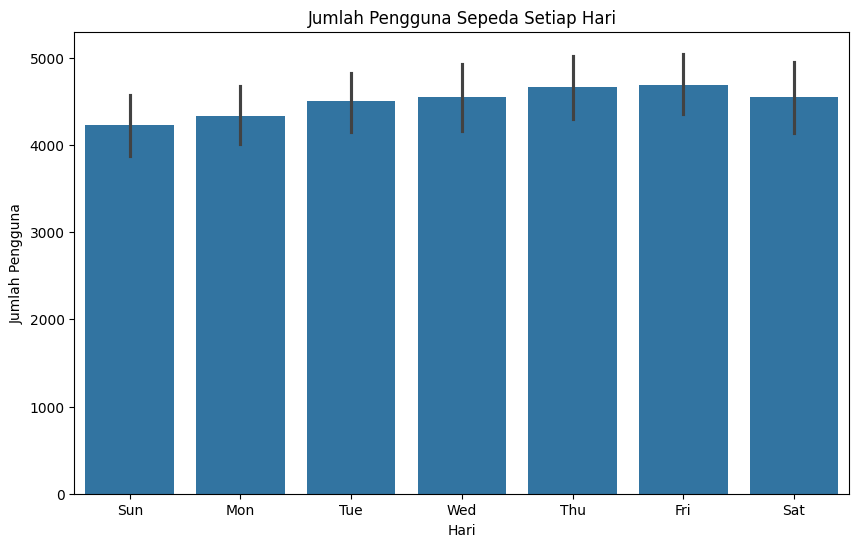

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weekday',
    y='cnt',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda Setiap Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengguna')
plt.show()

Hari paling sedikit penyewa adalah hari Minggu dan paling banyak pada hari Jum'at. Tapi dari keseluruhan tidak terlalu jauh berbeda antara hari satu dan hari lainnya.

# Kesimpulan
1. Rata-rata orang menyewa paling banyak pada sore hari, puncaknya pada pukul 17.00. Dan paling sedikit malam menjelang pagi, kemudian terjadi pelonjakan pada pukul 08.00.
2. Pada musim gugur menunjukkan tarif sewa sepeda tertinggi, sedangkan musim semi mencatat tarif terendah.
3. Pada Bulan September merupakan bulan dengan jumlah penyewaan sepeda terbanyak, sedangkan bulan Januari merupakan bulan terendah.
4. Ternyata pada hari kerja lebih banyak penyewa dari pada bukan hari kerja. Berdasarkan hasil sebelumnya memang hari kerja lebih banyak penyewa daripada hari libur maka data ini masuk akal. Ketika libur, lebih sedikit penyewa daripada hari kerja. Hari paling sedikit penyewa adalah hari Minggu dan paling banyak pada hari Jum'at. Tapi dari keseluruhan tidak terlalu jauh berbeda antara hari satu dan hari lainnya.